## Plot the results of omega dome vs trigone

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import linregress

In [2]:
import sys
sys.path.append('../../')
from consensus_variables import *

In [3]:
plots_dir = "plots"
data_dir = "data"

## dome vs trigone

In [4]:
omega_globalloc_dir = f"{deepcsa_run_dir}/omegagloballoc"

In [5]:
# load omega data
omega_df = pd.DataFrame()

for file in [file_ for file_ in os.listdir(omega_globalloc_dir) if file_.endswith(".tsv")]:
    sample_df = pd.read_csv(f"{omega_globalloc_dir}/{file}", sep = "\t", header = 0)
    sample_df["file"] = file
    sample_df["modality"] = "globalloc"
    omega_df = pd.concat((omega_df, sample_df)).reset_index(drop = True)

In [6]:
# filter by conseq type, profile and unique/multi modality
omega_df_f = omega_df.loc[(omega_df["gene"].isin(panel_no_hotspots)) &
                          (~omega_df["file"].str.contains("multi")) & 
                          (~omega_df["sample"].str.contains("non_prot_aff")) &
                          (omega_df["sample"].isin(all_sample_names_dirty)) &
                          (omega_df["impact"].isin(['missense', 'nonsense',
                                                    'essential_splice', 'truncating']))
                         ].reset_index(drop = True)
omega_df_f.head()

,gene,sample,impact,mutations,dnds,pvalue,lower,upper,file,modality
0,CREBBP,P19_0001_BDO_01,missense,1,0.559363,0.520620,0.031996,2.471594,output_mle.P19_0001_BDO_01.global_loc.tsv,globalloc
1,ARID1A,P19_0001_BDO_01,missense,7,2.721899,0.023765,1.164014,5.303687,output_mle.P19_0001_BDO_01.global_loc.tsv,globalloc
2,ARID1A,P19_0001_BDO_01,nonsense,3,13.795306,0.001483,3.390698,36.659686,output_mle.P19_0001_BDO_01.global_loc.tsv,globalloc
3,ARID1A,P19_0001_BDO_01,essential_splice,2,31.401563,0.001665,5.189876,98.589673,output_mle.P19_0001_BDO_01.global_loc.tsv,globalloc
4,ARID1A,P19_0001_BDO_01,truncating,5,17.893359,0.000011,6.348965,39.230029,output_mle.P19_0001_BDO_01.global_loc.tsv,globalloc


In [7]:
omega_df_f['CLEAN_SAMPLE_ID'] = omega_df_f['sample'].map(old2new_sample_names)
omega_df_f['SINGLE_SAMPLE'] = omega_df_f['CLEAN_SAMPLE_ID'].isin(single_sample_per_donor)
omega_df_f['bladder_loc'] = omega_df_f['CLEAN_SAMPLE_ID'].apply(lambda x : x[3:])
omega_df_f['donor'] = omega_df_f['CLEAN_SAMPLE_ID'].apply(lambda x : x[:2])

In [8]:
len(omega_df_f["donor"].unique()) # number of subplots

45

In [9]:
omega_df_f = omega_df_f.sort_values(by = "donor").reset_index(drop= True)
omega_df_f

,gene,sample,impact,mutations,dnds,pvalue,lower,upper,file,modality,CLEAN_SAMPLE_ID,SINGLE_SAMPLE,bladder_loc,donor
0,CREBBP,P19_0001_BDO_01,missense,1,0.559363,0.520620,0.031996,2.471594,output_mle.P19_0001_BDO_01.global_loc.tsv,globalloc,01_DO,False,DO,01
1,ARID1A,P19_0001_BTR_01,truncating,25,49.037451,0.000000,30.946908,74.528784,output_mle.P19_0001_BTR_01.global_loc.tsv,globalloc,01_TR,True,TR,01
2,CDKN1A,P19_0001_BTR_01,missense,1,2.873633,0.369301,0.163808,12.734473,output_mle.P19_0001_BTR_01.global_loc.tsv,globalloc,01_TR,True,TR,01
3,CDKN1A,P19_0001_BTR_01,nonsense,2,42.593774,0.000883,7.018493,134.489526,output_mle.P19_0001_BTR_01.global_loc.tsv,globalloc,01_TR,True,TR,01
4,CDKN1A,P19_0001_BTR_01,truncating,2,37.762451,0.001132,6.234293,118.732300,output_mle.P19_0001_BTR_01.global_loc.tsv,globalloc,01_TR,True,TR,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3123,NOTCH2,P19_0053_BDO_01,missense,34,3.187500,0.000000,2.210046,4.440552,output_mle.P19_0053_BDO_01.global_loc.tsv,globalloc,53_DO,False,DO,53
3124,RBM10,P19_0053_BDO_01,truncating,38,58.556250,0.000000,40.674166,81.953467,output_mle.P19_0053_BDO_01.global_loc.tsv,globalloc,53_DO,False,DO,53
3125,RBM10,P19_0053_BDO_01,essential_splice,14,71.025000,0.000000,39.392464,117.626563,output_mle.P19_0053_BDO_01.global_loc.tsv,globalloc,53_DO,False,DO,53
3126,EP300,P19_0053_BDO_01,essential_splice,4,14.237500,0.000211,4.385755,33.578320,output_mle.P19_0053_BDO_01.global_loc.tsv,globalloc,53_DO,False,DO,53


In [10]:
donors_and_impact = [("14", "missense"),
                     ("04", "missense"),
                     ("23", "missense"),
                     ("14", "truncating"),
                     ("04", "truncating"),
                     ("23", "truncating"),
                    ]


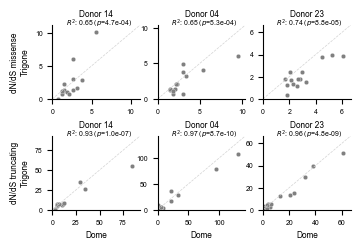

In [11]:
# define plot features
nrows_subplots = 2
ncols_subplots = 3
fig, axs = plt.subplots(nrows_subplots, ncols_subplots, figsize = (3.85, 2.4), sharey = False,
    gridspec_kw={'hspace': 0.5,
                    # 'wspace' : 0.1
    }
)
axs = axs.flatten()

# plot each donor separately
for i, tupl in enumerate(donors_and_impact):

    donor = tupl[0]
    impact = tupl[1]
    
    # subset by impact and create two tables: one for dnds, the other one for pvalues
    subset_df = omega_df_f.loc[omega_df_f["impact"] == impact]
    subset_df_piv = subset_df.pivot(index = ['donor', 'gene'], columns = 'bladder_loc', values = 'dnds').reset_index()
    subset_df_pvals_piv = subset_df.pivot(index = ['donor', 'gene'], columns = 'bladder_loc', values = 'pvalue').reset_index()
    
    ## subset donor 
    donor_subset_df = subset_df_piv.loc[subset_df_piv["donor"] == donor]
    donor_subset_pvals_df = subset_df_pvals_piv.loc[subset_df_pvals_piv["donor"] == donor]

    ## replace NA with 0 for dnds to avoid errors and merge w/ pvals
    donor_subset_df = donor_subset_df.replace(np.nan, 0)
    donor_subset_df = donor_subset_df.merge(donor_subset_pvals_df, on = ["donor", "gene"], suffixes = ["_dnds", "_pval"])

    ## plot dots and regression line
    sns.scatterplot(data = donor_subset_df, x = "DO_dnds", y = "TR_dnds", 
            ax = axs[i], legend = False, s = 10, linewidth = 0.2, color = "grey")

    min_val = -0.005
    max_val = max(donor_subset_df["DO_dnds"].max()*1.1, donor_subset_df["TR_dnds"].max()*1.1)
    axs[i].plot([min_val, max_val], [min_val, max_val], color = 'lightgrey', linestyle = '--', linewidth = 0.5)
    axs[i].set_xlim(min_val, max_val)
    axs[i].set_ylim(min_val, max_val)

    # make sure that the y and x axis ticks are the same
    xtickss = axs[i].get_xticks()
    ytickss = axs[i].get_yticks()
    if len(ytickss) > len(xtickss):
        axs[i].set_xticks(xtickss)
        axs[i].set_yticks(xtickss)
    else:
        axs[i].set_xticks(ytickss)
        axs[i].set_yticks(ytickss)
    axs[i].set_xlim(min_val, max_val)
    axs[i].set_ylim(min_val, max_val)

    
    
    ## annotate significant genes
    texts = []

    ## calculate linear regression fit if possible; otherwise, NA
    x1 = donor_subset_df[["DO_dnds", "TR_dnds"]].dropna()["DO_dnds"].values 
    y1 = donor_subset_df[["DO_dnds", "TR_dnds"]].dropna()["TR_dnds"].values
    try:
            res = linregress(x = x1, y = y1)
            r_squared = res.rvalue**2
            p_value = res.pvalue
            # f'$p$<{min_pvalue:.1e}' if p_value < min_pvalue else (f'$p$={p_value:.1e}' if p_value < 0.01 else f'$p$={p_value:.2f}'),

            # if p_value < 0.05:
            #     p_value = " < 0.05"
            # else:
            #     p_value = r'$\geq0.05$'

            p_value = f'$p$={p_value:.1e}' if p_value < 0.01 else f'$p$={p_value:.2f}'

            box_props = dict(boxstyle='square', facecolor='white', alpha=0.7)
            axs[i].annotate(f'$R^2$: {r_squared:.2f} ({p_value})', xy=(0.15, 0.98), xycoords='axes fraction',
                            fontsize=plots_general_config["annots_fontsize"], color='black')
    except ValueError:
            r_squared = "NA"
            p_value = "NA"
            box_props = dict(boxstyle='square', facecolor='white', alpha=0.7)
            axs[i].annotate(f'R-squared={r_squared}; {p_value})', xy=(0.15, 0.98), xycoords='axes fraction',
                            fontsize=plots_general_config["annots_fontsize"], color='black')

    ## finish annotating plot
    if i % ncols_subplots == 0:
        axs[i].set_ylabel(f"dN/dS {impact}\nTrigone")
    else:
        axs[i].set_ylabel("")
    if i >= (nrows_subplots-1) * ncols_subplots:
        axs[i].set_xlabel(f"Dome")
    else:
        axs[i].set_xlabel("")

    axs[i].set_title(f"Donor {donor}", fontsize = plots_general_config["xylabel_fontsize"])
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['top'].set_visible(False)

fig.savefig(f"{plots_dir}/ExtendedFig5_b.pdf", bbox_inches='tight', dpi = 300)
plt.show()